# 1.0 EDA

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv")
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [2]:
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [3]:
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [4]:
df.loc[df.duplicated()]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


> ### 1.1 labeling

In [24]:
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes('object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,4267,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [17]:
'''!pip uninstall -y scikit-learn imbalanced-learn
!pip install --no-cache-dir scikit-learn==1.3.2 imbalanced-learn==0.11.0'''

'!pip uninstall -y scikit-learn imbalanced-learn\n!pip install --no-cache-dir scikit-learn==1.3.2 imbalanced-learn==0.11.0'

In [18]:
X = df.drop(' loan_status', axis=1)
y = df[' loan_status']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

> ### 1.2 Handling imbalanced data using SMOTE
> - **SMOTE** : stands for Synthetic Minority Over-sampling Technique. It’s a popular technique used to handle imbalanced datasets, especially in binary classification when one class (e.g., "Approved") is much more common than the other (e.g., "Rejected").

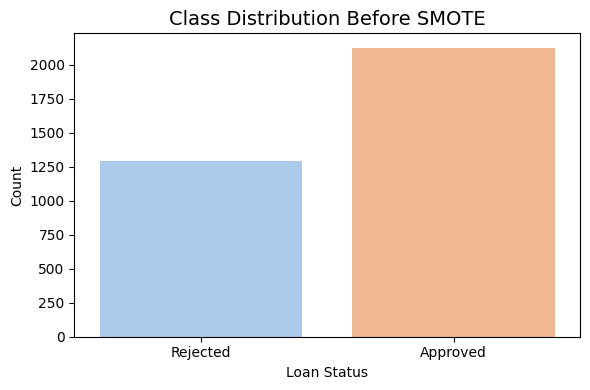

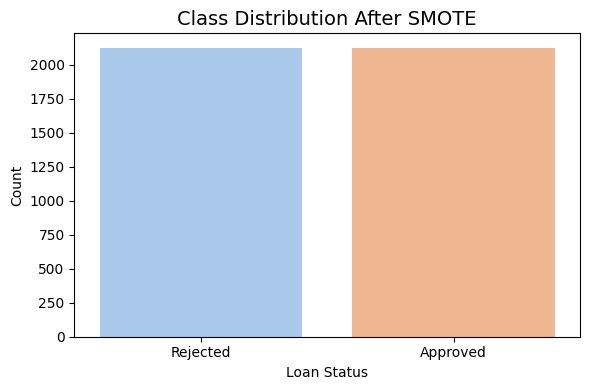

Before SMOTE: {'Approved': 2125, 'Rejected': 1290}
After SMOTE: {'Rejected': 2125, 'Approved': 2125}


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd


label_map = {0: 'Approved', 1: 'Rejected'}
y_train_named = y_train.map(label_map)
    

plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_named, palette='pastel')
plt.title("Class Distribution Before SMOTE", fontsize=14)
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

y_train_smote_named = pd.Series(y_train_smote).map(label_map)


plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_smote_named, palette='pastel')
plt.title("Class Distribution After SMOTE", fontsize=14)
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


before_counts = pd.Series(y_train).map(label_map).value_counts().to_dict()
after_counts = pd.Series(y_train_smote).map(label_map).value_counts().to_dict()
print("Before SMOTE:", before_counts)
print("After SMOTE:", after_counts)


# 2.0 Model 

> ### 2.1 Imports

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix,
    precision_score, recall_score, f1_score, roc_auc_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

> ### 2.2 Helper function

In [27]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"🔍 Evaluation for {model_name}")
    print(classification_report(y_true, y_pred, target_names=['Approved', 'Rejected']))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Approved', 'Rejected'], yticklabels=['Approved', 'Rejected'])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


> ### 2.3 logistic regression

🔍 Evaluation for Logistic Regression
              precision    recall  f1-score   support

    Approved       0.78      0.83      0.80       531
    Rejected       0.69      0.60      0.64       323

    accuracy                           0.75       854
   macro avg       0.73      0.72      0.72       854
weighted avg       0.74      0.75      0.74       854

Confusion Matrix:


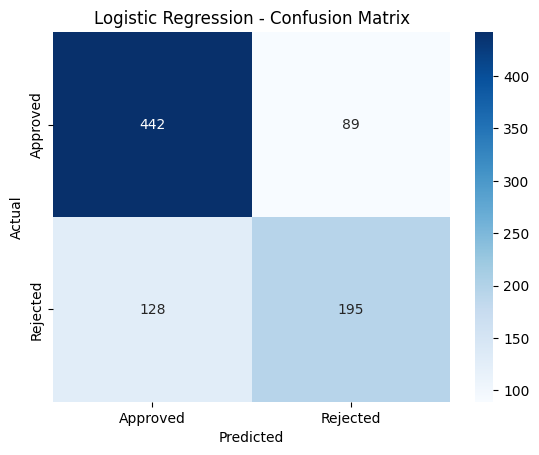

In [40]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_smote, y_train_smote)
y_pred_lr = lr_model.predict(X_test)

evaluate_model(y_test, y_pred_lr, "Logistic Regression")

> ### 2.4 Decision tree

🔍 Evaluation for Decision Tree
              precision    recall  f1-score   support

    Approved       0.98      0.98      0.98       531
    Rejected       0.98      0.97      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Confusion Matrix:


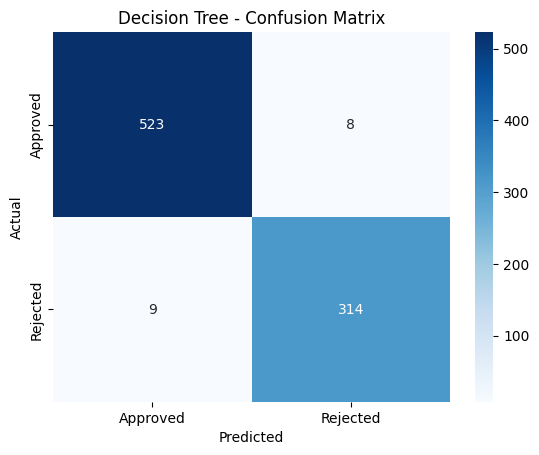

In [39]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)
y_pred_dt = dt_model.predict(X_test)

evaluate_model(y_test, y_pred_dt, "Decision Tree")

### Conclusion

After training and evaluating both **Logistic Regression** and **Decision Tree Classifier** on our loan approval prediction task, the results clearly show that the **Decision Tree Classifier significantly outperforms Logistic Regression** in terms of precision, recall, and F1-score.

This performance gap is especially important given the **imbalanced nature of the dataset**, where it's crucial to correctly identify the minority class (e.g., rejected applications). Decision Trees handle such imbalances better due to their ability to learn complex, non-linear decision boundaries and naturally account for feature interactions.

In contrast, Logistic Regression, being a linear model, struggled to capture the underlying patterns in the data and showed weaker performance across all evaluation metrics.

👉 **Therefore, for this classification task, the Decision Tree model is a much better choice and will be our final model moving forward.**
